In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.gaussian_process.kernels  import Matern
from sklearn.metrics.pairwise import laplacian_kernel
from sklearn.preprocessing import StandardScaler

Kernel matrices comparison

In [ ]:
df_a_laplacian_gridsearch=pd.read_csv("../train_test/Price/a_laplacian/task 4/models_a_laplacian_gridsearch.csv")
df_a_laplacian_gridsearch[df_a_laplacian_gridsearch["rank_test_score"]==1]
1e-4

0.0001

In [ ]:

# get best hyperparameters
df_a_laplacian_gridsearch=pd.read_csv("../train_test/SECURES-Met/CH/a_laplacian/models_a_laplacian_gridsearch.csv")
df_matern_05_gridsearch=pd.read_csv("../train_test/SECURES-Met/CH/matern_0.5/models_matern_0.5_gridsearch.csv")


df_a_laplacian_gridsearch[df_a_laplacian_gridsearch["rank_test_score"]==1]
# gamma=8, C=1 then regulariser~1e-4


,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,1,8784,87.716662,3.033893,0.088657,0.007157,8,{'gamma': 8},-513.827314,-370.069241,...,-411.395695,71.517787,1,-278.583925,-306.709738,-301.060319,-319.615374,-289.212569,-299.036385,14.151198


In [ ]:
# build kernel matrix associated
country="CH"

In [ ]:
# load train data
df=pd.read_csv(f"/Users/luca/Desktop/ThesisKernelMethods/experiments/Data/SECURES-Met/{country}/clean/train/df.csv")

# for the experiment with just temperature and wind_speed exp=""
# X y
X_train=df[["Direct_irradiation","Global_radiation","Hydro_reservoir","Hydro_river","Temperature","Wind_potential"]]
y_train=df["Load"]

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


a_laplacian_kernel_matrix=laplacian_kernel(X_train_scaled,X_train_scaled, gamma=1/8)


matern_kernel=100*Matern(length_scale=8, nu=0.5)
matern_kernel_matrix=matern_kernel(X_train_scaled,X_train_scaled)

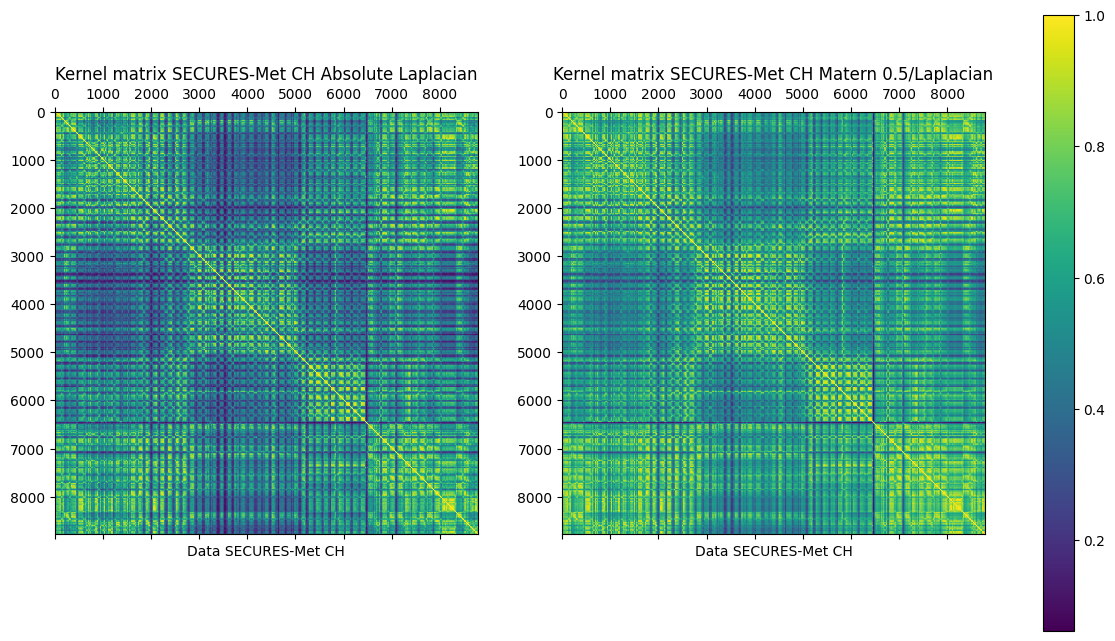

In [ ]:
# plot
fig, ax = plt.subplots(1,2,figsize=(15,8))
sc=ax[0].matshow(a_laplacian_kernel_matrix)
sc2=ax[1].matshow(matern_kernel_matrix)

ax[0].set_xlabel(f"Data SECURES-Met {country}")
ax[0].set_xlabel(f"Data SECURES-Met {country}")
ax[0].set_title(f"Kernel matrix SECURES-Met {country} Absolute Laplacian")


ax[1].set_xlabel(f"Data SECURES-Met {country}")
ax[1].set_xlabel(f"Data SECURES-Met {country}")
ax[1].set_title(f"Kernel matrix SECURES-Met {country} Matern 0.5/Laplacian")


fig.colorbar(sc, ax=ax)
plt.show()

<Figure size 1500x500 with 0 Axes>

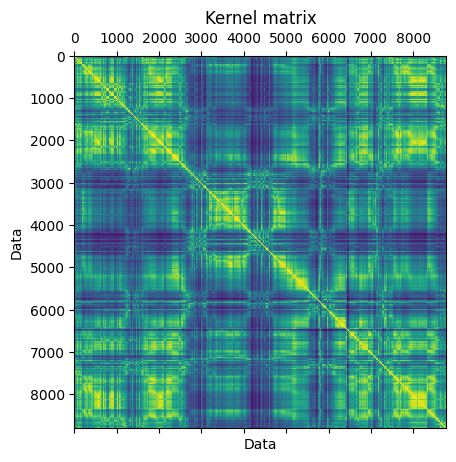

In [ ]:
# plot
plt.figure(figsize=(15,5))
plt.matshow(a_laplacian_kernel_matrix)

# ax[0].set_xlabel(f"Data SECURES-Met {country}")
# ax[0].set_xlabel(f"Data SECURES-Met {country}")
# ax[0].set_title(f"Kernel matrix SECURES-Met {country} Absolute Laplacian")


# ax[1].set_xlabel(f"Data SECURES-Met {country}")
# ax[1].set_xlabel(f"Data SECURES-Met {country}")
# ax[1].set_title(f"Kernel matrix SECURES-Met {country} Matern 0.5/Laplacian")


# plt.colorbar()
plt.title("Kernel matrix")
plt.xlabel("Data")
plt.ylabel("Data")
plt.show()

In [ ]:
np.zeros((1, 1, 3))

array([[[0., 0., 0.]]])